In [ ]:
#Clase de la capa de la red
import random as rand
import numpy as np
class red_neuronal():
  def __init__(self,neuronas_anteriores,neuronas,funcion_activacion):
    self.funcion_activacion=funcion_activacion
#Se multiplica por 2 y se resta uno para que los valores en la matriz estén dentro del rango (-2,2)
    self.b=np.random.rand(1,neuronas)*2-1
    self.W=np.random.rand(neuronas_anteriores,neuronas)*2-1


#Funciones de activacion Sigmoide
#Utilizaremos la palabre clave lamba para la funcion en vez de def, ya que es más sencilla, donde se define primeramente por la funcion sigmoide y como segunda entrada como la derivada
sigmoide=(lambda x: 1/(1+np.e**(-x)),
          lambda x: x*(1-x))


# Numero de neuronas en cada capa. 
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1] 

# Funciones de activacion usadas en cada capa. 
funciones_activacion = [sigmoide,sigmoide,sigmoide,sigmoide]

red= []
#Creamos las neuronas
for i in range(len(neuronas)-1):
  x = red_neuronal(neuronas[i],neuronas[i+1],funciones_activacion[i])
  red.append(x)
print(red)

[<__main__.red_neuronal object at 0x7f119aef1e48>, <__main__.red_neuronal object at 0x7f119aef1d68>, <__main__.red_neuronal object at 0x7f118482cef0>]


In [ ]:
X =  np.round(np.random.randn(20,2)) # Ejemplo de vector de entrada

z = X @ red[0].W

print(z[:10,:], X.shape, z.shape)

[[ 0.24685358  0.14112256 -0.45501903 -0.21868377]
 [-0.24685358 -0.14112256  0.45501903  0.21868377]
 [-0.24881291  0.52347832 -1.06551652  0.35002451]
 [-1.23818657  0.62358896 -0.76597597  1.35610033]
 [-0.74252007  0.2412332  -0.15547847  0.78739205]
 [-0.98937365  0.10011064  0.29954056  1.00607582]
 [-1.73189373  0.34134384  0.14406208  1.79346787]
 [-0.98937365  0.10011064  0.29954056  1.00607582]
 [ 0.          0.          0.          0.        ]
 [ 0.24685358  0.14112256 -0.45501903 -0.21868377]] (20, 2) (20, 4)


In [ ]:
z=z+red[0].b
print(z[:5,:])

[[ 0.77263235 -0.75835697  0.28371611 -0.19511265]
 [ 0.27892519 -1.04060209  1.19375417  0.2422549 ]
 [ 0.27696586 -0.37600121 -0.32678138  0.37359563]
 [-0.7124078  -0.27589057 -0.02724083  1.37967146]
 [-0.2167413  -0.65824633  0.58325667  0.81096318]]


In [ ]:
a=red[0].funcion_activacion[0](z)
print(a[:5,:])

[[0.68409005 0.31900309 0.57045704 0.451376  ]
 [0.5692827  0.26103384 0.76741182 0.56026926]
 [0.56880221 0.40709172 0.41902397 0.59232752]
 [0.32906702 0.43146154 0.49319021 0.79893823]
 [0.4460258  0.34113366 0.64181642 0.69231471]]


In [ ]:
output = [X]

for i in range(len(red)):
  z = output[-1] @ red[i].W + red[i].b
  a = red[i].funcion_activacion[0](z)
  output.append(a)

print(output[-1])

[[0.47544993]
 [0.48743774]
 [0.46537534]
 [0.46519667]
 [0.47821922]
 [0.48315382]
 [0.47591824]
 [0.48315382]
 [0.48202982]
 [0.47544993]
 [0.49158965]
 [0.49264514]
 [0.48202982]
 [0.47544993]
 [0.48315382]
 [0.47544993]
 [0.47544993]
 [0.48264737]
 [0.48743774]
 [0.48264737]]


In [ ]:
def error_cuadratico_medio(Yestimado,Yreal):
  x=(np.array(Yestimado-np.array(Yreal))**2)
  x=np.mean(x)

  y=np.array(Yestimado)-np.array(Yreal)
  return(x,y)

In [ ]:
r=[0]*10+[1]*10

In [ ]:
from random import shuffle
print(r,np.array(r).reshape(len(r),1))

[1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1] [[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]


In [ ]:
Y=[0]*10+[1]*10
Y=np.array(Y).reshape(len(Y),1)
error_cuadratico_medio(output[-1],Y)[0]

0.24759508712621625

In [ ]:
#veamos que valores tienen b y W en la última capa
red[-1].b
red[-1].W

array([[-0.20340154],
       [ 0.50514144],
       [-0.90943573],
       [ 0.06131724],
       [-0.56742646],
       [ 0.8998288 ],
       [-0.3012664 ],
       [ 0.57400269]])

In [ ]:
#backpropagation en la última capa
a=output[-1]
x=error_cuadratico_medio(a,Y)[1]*red[-2].funcion_activacion[1](a)
x

array([[ 0.11857593],
       [ 0.12178251],
       [ 0.11578591],
       [ 0.11573569],
       [ 0.11932794],
       [ 0.12065134],
       [ 0.11870356],
       [ 0.12065134],
       [ 0.12035179],
       [ 0.11857593],
       [-0.12706663],
       [-0.12681127],
       [-0.12932528],
       [-0.13082137],
       [-0.12906487],
       [-0.13082137],
       [-0.13082137],
       [-0.12918238],
       [-0.12805968],
       [-0.12918238]])

In [ ]:
  # Definimos el learning rate
lr = 0.05

# Creamos el indice inverso para ir de derecha a izquierda
back = list(range(len(output)-1))
back.reverse()

# Creamos el vector delta donde meteremos los errores en cada capa
delta = []

for capa in back:
  # Backprop #

  # Guardamos los resultados de la ultima capa antes de usar backprop para poder usarlas en gradient descent
  a = output[capa+1]

  # Backprop en la ultima capa 
  if capa == back[0]:
    x = error_cuadratico_medio(a,Y)[1] * red[capa].funcion_activacion[1](a)
    delta.append(x)

  # Backprop en el resto de capas 
  else:
    x = delta[-1] @ W_temp * red[capa].funcion_activacion[1](a)
    delta.append(x)

  # Guardamos los valores de W para poder usarlos en la iteracion siguiente
  W_temp = red[capa].W.transpose()

  # Gradient Descent #

  # Ajustamos los valores de los parametros de la capa
  red[capa].b = red[capa].b - delta[-1].mean() * lr
  red[capa].W = red[capa].W - (output[capa].T @ delta[-1]) * lr


print('MSE: ' + str(error_cuadratico_medio(output[-1],Y)[0]) )
print('Estimacion: ' + str(output[-1]) )

IndentationError: ignored

In [ ]:
import random
import math
from scipy import stats
import matplotlib.pyplot as plt
def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1):
  pi = math.pi
  r = R * np.sqrt(stats.truncnorm.rvs(minimo, maximo, size= num_datos)) * 10
  theta = stats.truncnorm.rvs(minimo, maximo, size= num_datos) * 2 * pi *10

  x = np.cos(theta) * r
  y = np.sin(theta) * r

  y = y.reshape((num_datos,1))
  x = x.reshape((num_datos,1))

  #Vamos a reducir el numero de elementos para que no cause un Overflow
  x = np.round(x,3)
  y = np.round(y,3)

  df = np.column_stack([x,y])
  return(df)

In [ ]:
datos_1 = circulo(num_datos = 150, R = 2)
datos_2 = circulo(num_datos = 150, R = 0.5)
X = np.concatenate([datos_1,datos_2])
X = np.round(X,3)

Y = [0] * 150 + [1] * 150
Y = np.array(Y).reshape(len(Y),1)

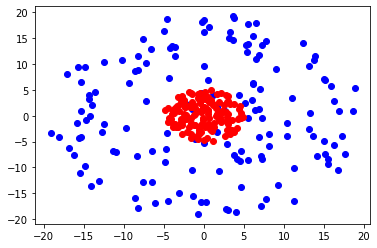

In [ ]:
plt.cla()
plt.scatter(X[0:150,0],X[0:150,1], c = "b")
plt.scatter(X[150:300,0],X[150:300,1], c = "r")
plt.show()

In [ ]:
def entrenamiento(X,Y, red_neuronal, lr = 0.01):

  # Output guardara el resultado de cada capa
  # En la capa 1, el resultado es el valor de entrada
  output = [X]

  for num_capa in range(len(red_neuronal)):
    z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b

    a = red_neuronal[num_capa].funcion_act[0](z)

    # Incluimos el resultado de la capa a output
    output.append(a)

  # Backpropagation

  back = list(range(len(output)-1))
  back.reverse()

  # Guardaremos el error de la capa en delta  
  delta = []

  for capa in back:
    # Backprop #delta

    a = output[capa+1]

    if capa == back[0]:
      x = error_cuadratico_medio(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    else:
      x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    W_temp = red_neuronal[capa].W.transpose()

    # Gradient Descent #
    red_neuronal[capa].b = red_neuronal[capa].b - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    red_neuronal[capa].W = red_neuronal[capa].W - output[capa].transpose() @ delta[-1] * lr

  return output[-1]

In [ ]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

neuronas = [2,4,8,1] 
funciones_activacion = [sigmoide,sigmoide, sigmoide]
red_neuronal = []

for paso in list(range(len(neuronas)-1)):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)    

In [ ]:
error = []
predicciones = []

for epoch in range(0,1000):
  ronda = entrenamiento(X = X ,Y = Y ,red_neuronal = red_neuronal, lr = 0.001)
  predicciones.append(ronda)
  temp = error_cuadratico_medio(np.round(predicciones[-1]),Y)[0]
  error.append(temp)

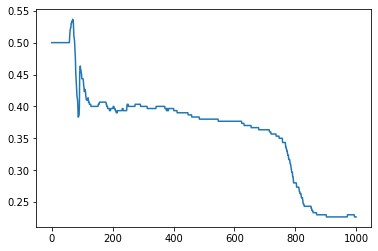

In [ ]:
epoch = list(range(0,1000))
plt.plot(epoch, error)

In [ ]:
plt(X,Y)
plt.show()

TypeError: ignored